In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from google.colab import files
import random
from sklearn.model_selection import train_test_split
from math import ceil

Function for uploading file to Google Colab

In [2]:
files.upload()

Saving x06Simple(1).csv to x06Simple(1).csv


{'x06Simple(1).csv': b'Index,Age,Temp of Water,Length of Fish\r\n1,14,25,620\r\n2,28,25,1315\r\n3,41,25,2120\r\n4,55,25,2600\r\n5,69,25,3110\r\n6,83,25,3535\r\n7,97,25,3935\r\n8,111,25,4465\r\n9,125,25,4530\r\n10,139,25,4570\r\n11,153,25,4600\r\n12,14,27,625\r\n13,28,27,1215\r\n14,41,27,2110\r\n15,55,27,2805\r\n16,69,27,3255\r\n17,83,27,4015\r\n18,97,27,4315\r\n19,111,27,4495\r\n20,125,27,4535\r\n21,139,27,4600\r\n22,153,27,4600\r\n23,14,29,590\r\n24,28,29,1305\r\n25,41,29,2140\r\n26,55,29,2890\r\n27,69,29,3920\r\n28,83,29,3920\r\n29,97,29,4515\r\n30,111,29,4520\r\n31,125,29,4525\r\n32,139,29,4565\r\n33,153,29,4566\r\n34,14,31,590\r\n35,28,31,1205\r\n36,41,31,1915\r\n37,55,31,2140\r\n38,69,31,2710\r\n39,83,31,3020\r\n40,97,31,3030\r\n41,111,31,3040\r\n42,125,31,3180\r\n43,139,31,3257\r\n44,153,31,3214\r\n'}

Random number generator, random integer in range, and random shuffle functions

In [3]:
#THE RANDOM NUMBER GENERATOR FUNCTION IS BY DEFAULT SEEDED WITH 0 IN THE FUNCTION
#DEFINITION
def r(seed=[0], m=2**32, a=1664525, c=1013904223):
  seed[0] = (a*seed[0]+c)%m
  return seed[0]

def randint(a, b):
  return int(a+(1+b-a)*r()/2**32)

def random_shuffle(data):
  len_data = data.shape[0]
  for i in range(len_data-1,0,-1):
    j = randint(0,i+1)
    data[[i,j]] = data[[j,i]]
  return data

Reading the CSV file, skipping the header information, and removing the index column.

In [ ]:
datax06 = np.genfromtxt('x06Simple(1).csv', delimiter=',', skip_header=1, dtype=int)
datax06 = np.delete(datax06, 0, 1)
datax06

Randomizing the data.

In [ ]:
datax06 = random_shuffle(datax06)
datax06

Separating dataset into X and Y variables

In [6]:
X06 = datax06[:,:-1]
Y06 = datax06[:,-1]

In [ ]:
X06

Splitting the data into training and testing sets on a 2/3 - 1/3 basis with rounding-up.

In [8]:
X_train = X06[:ceil(2/3*datax06.shape[0]),:]
X_test = X06[ceil(2/3*datax06.shape[0]):,:]
Y_train = Y06[:ceil(2/3*datax06.shape[0])]
Y_test = Y06[ceil(2/3*datax06.shape[0]):]

Calculating the mean and standard deviation of both features from the training dataset.

In [9]:
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0, ddof=1)
print(X_train_mean, X_train_std)

[86.         27.73333333] [46.55289909  2.37709375]


Standardizing the data using the computed mean and standard deviation.

In [10]:
sX_train = (X_train-X_train_mean)/X_train_std

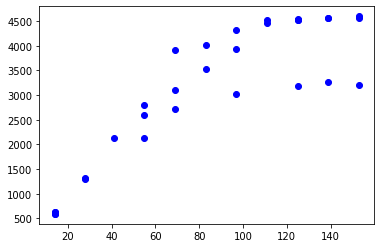

In [11]:
plt.plot(X_train[:,0], Y_train, 'bo')
plt.show()

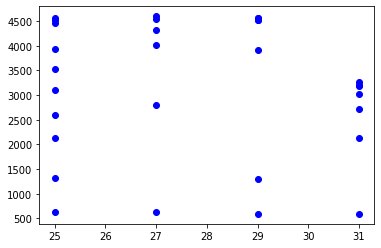

In [12]:
plt.plot(X_train[:,1], Y_train, 'bo')
plt.show()

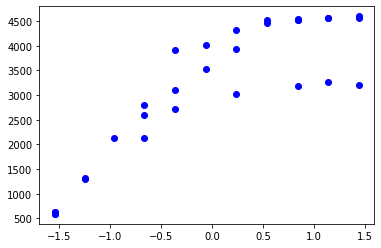

In [13]:
plt.plot(sX_train[:,0], Y_train, 'bo')
plt.show()

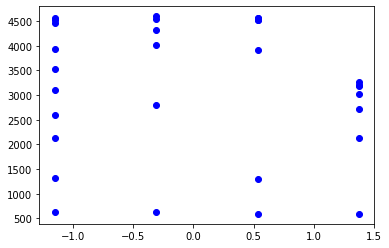

In [14]:
plt.plot(sX_train[:,1], Y_train, 'bo')
plt.show()

Adding the bias feature

In [15]:
bias = np.ones((sX_train.shape[0],1))
bias_sX_train = np.hstack((bias, sX_train))

Computing the closed-form solution of linear regression.

In [16]:
Theta06 = np.linalg.inv(bias_sX_train.T @ bias_sX_train) @ bias_sX_train.T @ Y_train
print(Theta06)

[3126.9        1266.6599659  -329.49611507]


Confirming our result with the sklearn.linear_model LinearRegression function.

In [17]:
reg06=sklearn.linear_model.LinearRegression().fit(bias_sX_train, Y_train)
reg06.coef_

array([   0.        , 1266.6599659 , -329.49611507])

In [18]:
reg06.intercept_

3126.9

Our result is confirmed.

The final model is:

$y = 3134 + 1241.86331461x_1 - 136.29475515x_2 $

Applying the solution to the testing samples.

Standardizing testing dataset.

In [19]:
sX_test = (X_test-X_train_mean)/X_train_std

Adding bias feature

In [ ]:
bias_test = np.ones((sX_test.shape[0],1))
bias_sX_test = np.hstack((bias_test, sX_test))
bias_sX_test

Computing the predictions

In [21]:
Y_pred = bias_sX_test @ Theta06
Y_pred

array([3354.32365404, 1095.97284835, 2107.84310201, 2869.69638586,
       4670.62896921, 3908.77568537, 2592.47037019, 2004.14247576,
       1726.91646009, 2765.9957596 , 3250.62302778, 1449.69044442,
       1650.42487968, 5328.7816268 ])

In [22]:
Y_test

array([3040, 1205, 2890, 3920, 4600, 4495, 3020, 2110, 2140, 3255, 4515,
       1915, 1215, 4600])

Computing the RMSE.

In [23]:
diff_arr = np.subtract(Y_test, Y_pred)
sq_arr = np.square(diff_arr)
mse = sq_arr.mean()
rmse = np.sqrt(mse)
rmse

616.0862025884468

Confirming our predictions with the linear regression predict function.

In [24]:
reg06.predict(bias_sX_test)

array([3354.32365404, 1095.97284835, 2107.84310201, 2869.69638586,
       4670.62896921, 3908.77568537, 2592.47037019, 2004.14247576,
       1726.91646009, 2765.9957596 , 3250.62302778, 1449.69044442,
       1650.42487968, 5328.7816268 ])

Results are confirmed.